In [112]:
import pandas as pd
import numpy as np
from glob import glob  
import os
from collections import Counter
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

## PreProcessing

#### Building Data Frame [ 1: kotlin files]

In [113]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\kt'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder print("0x{:02x}: {}".format(value, frequency),len(val),"\n",text)
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
    #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
    for prob_value, prob_dist_freq in prob_dist_c.most_common(n=5):
        prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
        prob_val.append("{:02x}".format(prob_value))
        prob_freq.append("{:.0%}".format(prob_dist_freq))
    #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
    for value, frequency in c.most_common(n=5):
        freq_value.append("0x{:02x}: {}".format(value,frequency))
        val.append("{:02x}".format(value))
        freq.append("{}".format(frequency))
    list_of_text.append((c,val,freq,freq_value,prob_val,prob_freq,prob_freq_dist_value,text,file))
df_kt = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:Frequency','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Value:ProbalilityDistribution','Text', 'Filename'])


print(df_kt.info())
print("*" * 80)
print(df_kt.memory_usage())
print("*" * 80)
df_kt.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             998 non-null    object
 1   OnlyValueForAbsoluteDistribution     998 non-null    object
 2   OnlyFrequency                        998 non-null    object
 3   Value:Frequency                      998 non-null    object
 4   OnlyValueForProbalilityDistribution  998 non-null    object
 5   OnlyProbalilityDistribution          998 non-null    object
 6   Value:ProbalilityDistribution        998 non-null    object
 7   Text                                 998 non-null    object
 8   Filename                             998 non-null    object
dtypes: object(9)
memory usage: 70.3+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:Frequency,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Value:ProbalilityDistribution,Text,Filename
0,"{47: 21, 42: 39, 10: 90, 32: 492, 67: 11, 111:...","[20, 65, 74, 69, 6e]","[492, 198, 182, 181, 158]","[0x20: 492, 0x65: 198, 0x74: 182, 0x69: 181, 0...","[20, 65, 74, 69, 6e]","[18%, 7%, 7%, 7%, 6%]","[0x20: 0.1769, 0x65: 0.0712, 0x74: 0.0654, 0x6...",b'/*\n * Copyright (C) 2018 The Android Open S...,0.kt
1,"{112: 7, 97: 17, 99: 17, 107: 1, 103: 6, 101: ...","[20, 74, 6f, 65, 69]","[40, 32, 28, 23, 23]","[0x20: 40, 0x74: 32, 0x6f: 28, 0x65: 23, 0x69:...","[20, 74, 6f, 65, 69]","[11%, 9%, 8%, 6%, 6%]","[0x20: 0.1072, 0x74: 0.0858, 0x6f: 0.0751, 0x6...",b'package com.trendyol.common\n\nimport androi...,1.kt


#### Building Data Frame [ 2: mak files]

In [114]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\mak'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
    #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
    for prob_value, prob_dist_freq in prob_dist_c.most_common(n=5):
        prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
        prob_val.append("{:02x}".format(prob_value))
        prob_freq.append("{:.0%}".format(prob_dist_freq))
    #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
    for value, frequency in c.most_common(n=5):
        freq_value.append("0x{:02x}: {}".format(value,frequency))
        val.append("{:02x}".format(value))
        freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))
# create a dataframe and save
df_mak = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])


print(df_mak.info())
print("*" * 80)
print(df_mak.memory_usage())
print("*" * 80)
df_mak.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             96 non-null     object
 1   Value:Frequency                      96 non-null     object
 2   OnlyValueForAbsoluteDistribution     96 non-null     object
 3   OnlyFrequency                        96 non-null     object
 4   Value:ProbalilityDistribution        96 non-null     object
 5   OnlyValueForProbalilityDistribution  96 non-null     object
 6   OnlyProbalilityDistribution          96 non-null     object
 7   Text                                 96 non-null     object
 8   Filename                             96 non-null     object
dtypes: object(9)
memory usage: 6.9+ KB
None
********************************************************************************
Index                                  128
OccurrenceOfBy

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 24, 32: 213, 116: 71, 104: 58, 101: 255, ...","[0x65: 255, 0x20: 213, 0x5f: 165, 0x6e: 150, 0...","[65, 20, 5f, 6e, 61]","[255, 213, 165, 150, 129]","[0x65: 0.0935, 0x20: 0.0781, 0x5f: 0.0605, 0x6...","[65, 20, 5f, 6e, 61]","[9%, 8%, 6%, 6%, 5%]",b'# these are the variables your Makefile.am s...,0.mak
1,"{32: 1332, 35: 369, 13: 44, 10: 44, 67: 21, 10...","[0x20: 1332, 0x23: 369, 0x65: 74, 0x74: 72, 0x...","[20, 23, 65, 74, 2d]","[1332, 369, 74, 72, 68]","[0x20: 0.4268, 0x23: 0.1182, 0x65: 0.0237, 0x7...","[20, 23, 65, 74, 2d]","[43%, 12%, 2%, 2%, 2%]","b"" ###########################################...",1.mak


#### Building Data Frame [ 3: ml files]

In [115]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\ml'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for prob_value, prob_dist_freq in prob_dist_c.most_common(n=5):
            prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
            prob_val.append("{:02x}".format(prob_value))
            prob_freq.append("{:.0%}".format(prob_dist_freq))
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for value, frequency in c.most_common(n=5):
            freq_value.append("0x{:02x}: {}".format(value,frequency))
            val.append("{:02x}".format(value))
            freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))
# create a dataframe and save
df_ml = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])


print(df_ml.info())
print("*" * 80)
print(df_ml.memory_usage())
print("*" * 80)
df_ml.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             263 non-null    object
 1   Value:Frequency                      263 non-null    object
 2   OnlyValueForAbsoluteDistribution     263 non-null    object
 3   OnlyFrequency                        263 non-null    object
 4   Value:ProbalilityDistribution        263 non-null    object
 5   OnlyValueForProbalilityDistribution  263 non-null    object
 6   OnlyProbalilityDistribution          263 non-null    object
 7   Text                                 263 non-null    object
 8   Filename                             263 non-null    object
dtypes: object(9)
memory usage: 18.6+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{40: 31, 42: 50, 32: 644, 67: 9, 111: 95, 112:...","[0x20: 644, 0x65: 193, 0x74: 158, 0x69: 157, 0...","[20, 65, 74, 69, 6e]","[644, 193, 158, 157, 121]","[0x20: 0.2264, 0x65: 0.0678, 0x74: 0.0555, 0x6...","[20, 65, 74, 69, 6e]","[23%, 7%, 6%, 6%, 4%]","b""(* Copyright (C) 2005, HELM Team.\n * \n * T...",0.ml
1,"{111: 941, 112: 642, 101: 1741, 110: 1352, 32:...","[0x20: 4404, 0x65: 1741, 0x6e: 1352, 0x74: 132...","[20, 65, 6e, 74, 5f]","[4404, 1741, 1352, 1326, 1220]","[0x20: 0.1860, 0x65: 0.0735, 0x6e: 0.0571, 0x7...","[20, 65, 6e, 74, 5f]","[19%, 7%, 6%, 6%, 5%]",b'open Printer\nopen CErrors\nopen Util\nopen ...,1.ml


#### Building Data Frame [ 4: rexx files]

In [116]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\rexx'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for prob_value, prob_dist_freq in prob_dist_c.most_common(n=5):
            prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
            prob_val.append("{:02x}".format(prob_value))
            prob_freq.append("{:.0%}".format(prob_dist_freq))
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for value, frequency in c.most_common(n=5):
            freq_value.append("0x{:02x}: {}".format(value,frequency))
            val.append("{:02x}".format(value))
            freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))
# create a dataframe and save
df_rexx = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])

print(df_rexx.info())
print("*" * 80)
print(df_rexx.memory_usage())
print("*" * 80)
df_rexx.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             242 non-null    object
 1   Value:Frequency                      242 non-null    object
 2   OnlyValueForAbsoluteDistribution     242 non-null    object
 3   OnlyFrequency                        242 non-null    object
 4   Value:ProbalilityDistribution        242 non-null    object
 5   OnlyValueForProbalilityDistribution  242 non-null    object
 6   OnlyProbalilityDistribution          242 non-null    object
 7   Text                                 242 non-null    object
 8   Filename                             242 non-null    object
dtypes: object(9)
memory usage: 17.1+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{47: 4, 42: 8, 32: 120, 80: 5, 68: 2, 87: 2, 8...","[0x20: 120, 0x27: 18, 0x0a: 17, 0x65: 16, 0x72...","[20, 27, 0a, 65, 72]","[120, 18, 17, 16, 15]","[0x20: 0.3226, 0x27: 0.0484, 0x0a: 0.0457, 0x6...","[20, 27, 0a, 65, 72]","[32%, 5%, 5%, 4%, 4%]","b""/* PDWPRCEV REXX Process output of 'runp...",0.rexx
1,"{47: 8, 42: 230, 32: 496, 82: 15, 69: 11, 88: ...","[0x20: 496, 0x2a: 230, 0x61: 149, 0x6e: 139, 0...","[20, 2a, 61, 6e, 65]","[496, 230, 149, 139, 136]","[0x20: 0.1800, 0x2a: 0.0835, 0x61: 0.0541, 0x6...","[20, 2a, 61, 6e, 65]","[18%, 8%, 5%, 5%, 5%]","b""/* REXX ************************************...",1.rexx


#### Building Data Frame [ 5: csproj files]

In [117]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\csproj'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for prob_value, prob_dist_freq in prob_dist_c.most_common(n=5):
            prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
            prob_val.append("{:02x}".format(prob_value))
            prob_freq.append("{:.0%}".format(prob_dist_freq))
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for value, frequency in c.most_common(n=5):
            freq_value.append("0x{:02x}: {}".format(value,frequency))
            val.append("{:02x}".format(value))
            freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))

# create a dataframe and save
df_csproj = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])

print(df_csproj.info())
print("*" * 80)
print(df_csproj.memory_usage())
print("*" * 80)
df_csproj.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             235 non-null    object
 1   Value:Frequency                      235 non-null    object
 2   OnlyValueForAbsoluteDistribution     235 non-null    object
 3   OnlyFrequency                        235 non-null    object
 4   Value:ProbalilityDistribution        235 non-null    object
 5   OnlyValueForProbalilityDistribution  235 non-null    object
 6   OnlyProbalilityDistribution          235 non-null    object
 7   Text                                 235 non-null    object
 8   Filename                             235 non-null    object
dtypes: object(9)
memory usage: 16.6+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{239: 1, 187: 1, 191: 1, 60: 22, 80: 16, 114: ...","[0x20: 43, 0x65: 42, 0x72: 40, 0x74: 39, 0x6f:...","[20, 65, 72, 74, 6f]","[43, 42, 40, 39, 36]","[0x20: 0.0692, 0x65: 0.0676, 0x72: 0.0644, 0x7...","[20, 65, 72, 74, 6f]","[7%, 7%, 6%, 6%, 6%]","b'\xef\xbb\xbf<Project Sdk=""Microsoft.NET.Sdk""...",0.csproj
1,"{239: 1, 187: 1, 191: 1, 60: 29, 80: 21, 114: ...","[0x65: 152, 0x20: 113, 0x72: 83, 0x74: 76, 0x6...","[65, 20, 72, 74, 6f]","[152, 113, 83, 76, 74]","[0x65: 0.1086, 0x20: 0.0807, 0x72: 0.0593, 0x7...","[65, 20, 72, 74, 6f]","[11%, 8%, 6%, 5%, 5%]","b'\xef\xbb\xbf<Project Sdk=""Microsoft.NET.Sdk""...",1.csproj


#### Building Data Frame [ 6: jenkinsfile files]

In [118]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\jenkinsfile'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for prob_value, prob_dist_freq in prob_dist_c.most_common(n=5):
            prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
            prob_val.append("{:02x}".format(prob_value))
            prob_freq.append("{:.0%}".format(prob_dist_freq))
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for value, frequency in c.most_common(n=5):
            freq_value.append("0x{:02x}: {}".format(value,frequency))
            val.append("{:02x}".format(value))
            freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))

# create a dataframe and save
df_jenkinsfile = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])

print(df_jenkinsfile.info())
print("*" * 80)
print(df_jenkinsfile.memory_usage())
print("*" * 80)
df_jenkinsfile.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             249 non-null    object
 1   Value:Frequency                      249 non-null    object
 2   OnlyValueForAbsoluteDistribution     249 non-null    object
 3   OnlyFrequency                        249 non-null    object
 4   Value:ProbalilityDistribution        249 non-null    object
 5   OnlyValueForProbalilityDistribution  249 non-null    object
 6   OnlyProbalilityDistribution          249 non-null    object
 7   Text                                 249 non-null    object
 8   Filename                             249 non-null    object
dtypes: object(9)
memory usage: 17.6+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{74: 1, 101: 15, 110: 6, 107: 2, 105: 10, 115:...","[0x20: 83, 0x65: 15, 0x0a: 14, 0x69: 10, 0x73: 8]","[20, 65, 0a, 69, 73]","[83, 15, 14, 10, 8]","[0x20: 0.3934, 0x65: 0.0711, 0x0a: 0.0664, 0x6...","[20, 65, 0a, 69, 73]","[39%, 7%, 7%, 5%, 4%]","b""Jenkinsfile (Declarative Pipeline)\n\npipeli...",0.jenkinsfile
1,"{110: 17, 111: 13, 100: 2, 101: 39, 32: 109, 1...","[0x20: 109, 0x65: 39, 0x74: 34, 0x73: 32, 0x22...","[20, 65, 74, 73, 22]","[109, 39, 34, 32, 30]","[0x20: 0.2261, 0x65: 0.0809, 0x74: 0.0705, 0x7...","[20, 65, 74, 73, 22]","[23%, 8%, 7%, 7%, 6%]","b'node {\n test = ""<testsuite tests=\\""3\\""...",1.jenkinsfile


##  Splitting above data frames to form train, validation and test data frame

In [119]:
print((df_kt.shape,df_mak.shape,df_ml.shape,df_rexx.shape,df_csproj.shape,df_jenkinsfile.shape))

((998, 9), (96, 9), (263, 9), (242, 9), (235, 9), (249, 9))


##### Train and Test dataframe for kt files

In [120]:
df_kt_train, df_kt_test = train_test_split(df_kt, test_size=0.3)
df_kt_train.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:Frequency,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Value:ProbalilityDistribution,Text,Filename
0,"{112: 23, 97: 31, 99: 11, 107: 2, 103: 13, 101...","[20, 74, 65, 6e, 72]","[72, 64, 49, 44, 35]","[0x20: 72, 0x74: 64, 0x65: 49, 0x6e: 44, 0x72:...","[20, 74, 65, 6e, 72]","[11%, 10%, 7%, 7%, 5%]","[0x20: 0.1078, 0x74: 0.0958, 0x65: 0.0734, 0x6...",b'package com.example.minavigationdrawer\n\nim...,883.kt
1,"{112: 8, 97: 23, 99: 8, 107: 5, 103: 4, 101: 3...","[20, 74, 73, 65, 6f]","[127, 47, 40, 39, 25]","[0x20: 127, 0x74: 47, 0x73: 40, 0x65: 39, 0x6f...","[20, 74, 73, 65, 6f]","[22%, 8%, 7%, 7%, 4%]","[0x20: 0.2167, 0x74: 0.0802, 0x73: 0.0683, 0x6...",b'package samples.assumptions\n\nimport dev.mi...,631.kt


In [121]:
df_kt_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:Frequency,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Value:ProbalilityDistribution,Text,Filename
0,"{112: 16, 97: 22, 99: 21, 107: 6, 103: 6, 101:...","[20, 6f, 65, 74, 69]","[108, 95, 87, 69, 62]","[0x20: 108, 0x6f: 95, 0x65: 87, 0x74: 69, 0x69...","[20, 6f, 65, 74, 69]","[11%, 10%, 9%, 7%, 6%]","[0x20: 0.1124, 0x6f: 0.0989, 0x65: 0.0905, 0x7...",b'package org.jetbrains.dukat.ast.model.visito...,143.kt
1,"{112: 28, 97: 44, 99: 36, 107: 1, 103: 19, 101...","[6f, 72, 6e, 20, 74]","[95, 78, 74, 71, 57]","[0x6f: 95, 0x72: 78, 0x6e: 74, 0x20: 71, 0x74:...","[6f, 72, 6e, 20, 74]","[9%, 8%, 7%, 7%, 6%]","[0x6f: 0.0925, 0x72: 0.0759, 0x6e: 0.0721, 0x2...",b'package com.rmnivnv.cryptomoon.ui.main\n\nim...,742.kt


##### Train and Test dataframe for mak files

In [122]:
df_mak_train, df_mak_test = train_test_split(df_mak, test_size=0.3)
df_mak_train.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 1121, 13: 710, 10: 710, 32: 1683, 77: 256...","[0x20: 1683, 0x23: 1121, 0x65: 860, 0x0d: 710,...","[20, 23, 65, 0d, 0a]","[1683, 1121, 860, 710, 710]","[0x20: 0.0869, 0x23: 0.0579, 0x65: 0.0444, 0x0...","[20, 23, 65, 0d, 0a]","[9%, 6%, 4%, 4%, 4%]","b'#\r\n# Makefile for VIM on Win32, using Cygn...",27.mak
1,"{35: 367, 32: 607, 77: 24, 105: 203, 99: 83, 1...","[0x20: 607, 0x0d: 378, 0x23: 367, 0x65: 275, 0...","[20, 0d, 23, 65, 69]","[607, 378, 367, 275, 203]","[0x20: 0.0968, 0x0d: 0.0603, 0x23: 0.0585, 0x6...","[20, 0d, 23, 65, 69]","[10%, 6%, 6%, 4%, 3%]",b'# Microsoft Developer Studio Generated NMAKE...,49.mak


In [123]:
df_mak_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 575, 13: 230, 10: 115, 32: 422, 70: 19, 1...","[0x23: 575, 0x20: 422, 0x0d: 230, 0x65: 223, 0...","[23, 20, 0d, 65, 74]","[575, 422, 230, 223, 134]","[0x23: 0.1644, 0x20: 0.1207, 0x0d: 0.0658, 0x6...","[23, 20, 0d, 65, 74]","[16%, 12%, 7%, 6%, 4%]",b'############################################...,35.mak
1,"{35: 42, 32: 421, 67: 31, 111: 142, 112: 72, 1...","[0x20: 421, 0x65: 208, 0x6f: 142, 0x74: 136, 0...","[20, 65, 6f, 74, 69]","[421, 208, 142, 136, 110]","[0x20: 0.1386, 0x65: 0.0685, 0x6f: 0.0467, 0x7...","[20, 65, 6f, 74, 69]","[14%, 7%, 5%, 4%, 4%]",b'# Copyright 2018 Embedded Microprocessor Ben...,51.mak


##### Train and Test dataframe for ml files

In [124]:
df_ml_train, df_ml_test = train_test_split(df_ml, test_size=0.3)
df_ml_train.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{10: 55, 108: 39, 101: 42, 116: 24, 32: 114, 1...","[0x20: 114, 0x28: 73, 0x29: 73, 0x2c: 57, 0x0a...","[20, 28, 29, 2c, 0a]","[114, 73, 73, 57, 55]","[0x20: 0.1287, 0x28: 0.0824, 0x29: 0.0824, 0x2...","[20, 28, 29, 2c, 0a]","[13%, 8%, 8%, 6%, 6%]","b'\nlet padZero l1 l2 =\n let (a,b) = ((List....",18.ml
1,"{10: 66, 108: 13, 101: 8, 116: 11, 32: 99, 114...","[0x20: 99, 0x28: 94, 0x29: 94, 0x36: 91, 0x2c:...","[20, 28, 29, 36, 2c]","[99, 94, 94, 91, 78]","[0x20: 0.1076, 0x28: 0.1022, 0x29: 0.1022, 0x3...","[20, 28, 29, 36, 2c]","[11%, 10%, 10%, 10%, 8%]","b""\nlet rec mulByDigit i l =\n match l with\n...",247.ml


In [125]:
df_ml_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{40: 322, 42: 458, 41: 322, 10: 942, 32: 5705,...","[0x20: 5705, 0x65: 1752, 0x74: 1576, 0x6e: 136...","[20, 65, 74, 6e, 61]","[5705, 1752, 1576, 1368, 1166]","[0x20: 0.2076, 0x65: 0.0638, 0x74: 0.0573, 0x6...","[20, 65, 74, 6e, 61]","[21%, 6%, 6%, 5%, 4%]",b'(*******************************************...,193.ml
1,"{40: 68, 42: 17, 10: 187, 32: 1690, 84: 7, 104...","[0x20: 1690, 0x65: 386, 0x74: 282, 0x73: 222, ...","[20, 65, 74, 73, 6e]","[1690, 386, 282, 222, 222]","[0x20: 0.2999, 0x65: 0.0685, 0x74: 0.0500, 0x7...","[20, 65, 74, 73, 6e]","[30%, 7%, 5%, 4%, 4%]",b'(*\n * This file is part of the Watson Conv...,241.ml


##### Train and Test dataframe for rexx files

In [126]:
df_rexx_train, df_rexx_test = train_test_split(df_rexx, test_size=0.3)
df_rexx_train.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{114: 19, 101: 73, 116: 17, 32: 117, 61: 8, 12...","[0x20: 117, 0x65: 73, 0x61: 52, 0x0a: 37, 0x22...","[20, 65, 61, 0a, 22]","[117, 73, 52, 37, 24]","[0x20: 0.1899, 0x65: 0.1185, 0x61: 0.0844, 0x0...","[20, 65, 61, 0a, 22]","[19%, 12%, 8%, 6%, 4%]","b'ret = example1()\nsay """"\nret = example2()\n...",210.rexx
1,"{47: 28, 42: 24, 32: 294, 67: 15, 97: 83, 108:...","[0x20: 294, 0x65: 99, 0x74: 96, 0x6f: 93, 0x73...","[20, 65, 74, 6f, 73]","[294, 99, 96, 93, 87]","[0x20: 0.1303, 0x65: 0.0439, 0x74: 0.0425, 0x6...","[20, 65, 74, 6f, 73]","[13%, 4%, 4%, 4%, 4%]",b'/* Calculate total playing time of a song.\n...,16.rexx


In [127]:
df_rexx_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{47: 2, 42: 138, 32: 89, 82: 2, 69: 5, 88: 2, ...","[0x2a: 138, 0x20: 89, 0x30: 36, 0x2e: 29, 0x65...","[2a, 20, 30, 2e, 65]","[138, 89, 36, 29, 25]","[0x2a: 0.2150, 0x20: 0.1386, 0x30: 0.0561, 0x2...","[2a, 20, 30, 2e, 65]","[21%, 14%, 6%, 5%, 4%]",b'/* REXX ************************************...,202.rexx
1,"{47: 14, 42: 16, 82: 1, 69: 1, 88: 2, 32: 239,...","[0x20: 239, 0xe2: 86, 0x94: 86, 0x80: 86, 0x65...","[20, e2, 94, 80, 65]","[239, 86, 86, 86, 25]","[0x20: 0.2716, 0xe2: 0.0977, 0x94: 0.0977, 0x8...","[20, e2, 94, 80, 65]","[27%, 10%, 10%, 10%, 3%]",b'/*REXX program calculates binomial coeffic...,31.rexx


##### Train and Test dataframe for csproj files

In [128]:
df_csproj_train, df_csproj_test = train_test_split(df_csproj, test_size=0.3)
df_csproj_train.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{239: 1, 187: 1, 191: 1, 60: 73, 63: 2, 120: 1...","[0x20: 264, 0x65: 212, 0x74: 146, 0x6f: 131, 0...","[20, 65, 74, 6f, 72]","[264, 212, 146, 131, 124]","[0x20: 0.0995, 0x65: 0.0799, 0x74: 0.0550, 0x6...","[20, 65, 74, 6f, 72]","[10%, 8%, 6%, 5%, 5%]","b'\xef\xbb\xbf<?xml version=""1.0"" encoding=""ut...",220.csproj
1,"{60: 6, 80: 4, 114: 16, 111: 10, 106: 2, 101: ...","[0x72: 16, 0x6f: 10, 0x65: 9, 0x74: 9, 0x20: 9]","[72, 6f, 65, 74, 20]","[16, 10, 9, 9, 9]","[0x72: 0.1103, 0x6f: 0.0690, 0x65: 0.0621, 0x7...","[72, 6f, 65, 74, 20]","[11%, 7%, 6%, 6%, 6%]","b'<Project Sdk=""Microsoft.NET.Sdk"">\r\n\r\n <...",211.csproj


In [129]:
df_csproj_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{60: 11, 80: 5, 114: 22, 111: 15, 106: 4, 101:...","[0x65: 24, 0x20: 23, 0x72: 22, 0x74: 19, 0x6f:...","[65, 20, 72, 74, 6f]","[24, 23, 22, 19, 15]","[0x65: 0.0882, 0x20: 0.0846, 0x72: 0.0809, 0x7...","[65, 20, 72, 74, 6f]","[9%, 8%, 8%, 7%, 6%]","b'<Project Sdk=""Microsoft.NET.Sdk"">\n\n <Prop...",115.csproj
1,"{60: 237, 63: 2, 120: 36, 109: 119, 108: 152, ...","[0x20: 641, 0x65: 458, 0x74: 362, 0x6f: 353, 0...","[20, 65, 74, 6f, 72]","[641, 458, 362, 353, 349]","[0x20: 0.0983, 0x65: 0.0703, 0x74: 0.0555, 0x6...","[20, 65, 74, 6f, 72]","[10%, 7%, 6%, 5%, 5%]","b'<?xml version=""1.0"" encoding=""utf-8""?>\n<Pro...",207.csproj


##### Train and Test dataframe for jenkinsfile files

In [130]:
df_jenkinsfile_train, df_jenkinsfile_test = train_test_split(df_jenkinsfile, test_size=0.2)
df_jenkinsfile_train.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 1, 33: 1, 103: 14, 114: 25, 111: 34, 118:...","[0x20: 388, 0x65: 62, 0x0a: 57, 0x6c: 53, 0x69...","[20, 65, 0a, 6c, 69]","[388, 62, 57, 53, 37]","[0x20: 0.3193, 0x65: 0.0510, 0x0a: 0.0469, 0x6...","[20, 65, 0a, 6c, 69]","[32%, 5%, 5%, 4%, 3%]",b'#!groovy\n@Library(\'jenkins\') _\n\ndef bui...,117.jenkinsfile
1,"{115: 119, 116: 166, 97: 102, 103: 13, 101: 21...","[0x20: 1982, 0x65: 219, 0x74: 166, 0x0a: 148, ...","[20, 65, 74, 0a, 73]","[1982, 219, 166, 148, 119]","[0x20: 0.3880, 0x65: 0.0429, 0x74: 0.0325, 0x0...","[20, 65, 74, 0a, 73]","[39%, 4%, 3%, 3%, 2%]","b'stage(\'test-sgx\') {\n timeout(time: 5, ...",40.jenkinsfile


In [131]:
df_jenkinsfile_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{64: 2, 76: 1, 105: 9, 98: 2, 114: 8, 97: 13, ...","[0x20: 131, 0x0a: 15, 0x65: 14, 0x61: 13, 0x6c...","[20, 0a, 65, 61, 6c]","[131, 15, 14, 13, 10]","[0x20: 0.4253, 0x0a: 0.0487, 0x65: 0.0455, 0x6...","[20, 0a, 65, 61, 6c]","[43%, 5%, 5%, 4%, 3%]","b'@Library(""pipe-shared-libs@dev"") _\nimport c...",214.jenkinsfile
1,"{35: 1, 33: 1, 103: 14, 114: 16, 111: 23, 118:...","[0x74: 43, 0x20: 39, 0x65: 39, 0x69: 34, 0x73:...","[74, 20, 65, 69, 73]","[43, 39, 39, 34, 34]","[0x74: 0.0786, 0x20: 0.0713, 0x65: 0.0713, 0x6...","[74, 20, 65, 69, 73]","[8%, 7%, 7%, 6%, 6%]",b'#!groovy\n\n// trick from https://github.com...,156.jenkinsfile


In [132]:
# Train and Test Data Frame for each type of files has been created above
#df_kt
#df_mak
#df_ml
#df_rexx
#df_csproj
#df_jenkinsfile

In [133]:
print((df_kt_train.shape,df_mak_train.shape,df_ml_train.shape,df_rexx_train.shape,df_csproj_train.shape,df_jenkinsfile_train.shape))

((698, 9), (67, 9), (184, 9), (169, 9), (164, 9), (199, 9))


In [134]:
print((df_kt_test.shape,df_mak_test.shape,df_ml_test.shape,df_rexx_test.shape,df_csproj_test.shape,df_jenkinsfile_test.shape))

((300, 9), (29, 9), (79, 9), (73, 9), (71, 9), (50, 9))


### Building the train data frame

In [135]:
frames = [df_jenkinsfile_train,df_csproj_train,df_rexx_train,df_ml_train,df_mak_train,df_kt_train]

train_df = pd.concat(frames)
print(train_df.shape)
train_df.reset_index(drop=True).head(2)

(1481, 9)


,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 1, 33: 1, 103: 14, 114: 25, 111: 34, 118:...","[0x20: 388, 0x65: 62, 0x0a: 57, 0x6c: 53, 0x69...","[20, 65, 0a, 6c, 69]","[388, 62, 57, 53, 37]","[0x20: 0.3193, 0x65: 0.0510, 0x0a: 0.0469, 0x6...","[20, 65, 0a, 6c, 69]","[32%, 5%, 5%, 4%, 3%]",b'#!groovy\n@Library(\'jenkins\') _\n\ndef bui...,117.jenkinsfile
1,"{115: 119, 116: 166, 97: 102, 103: 13, 101: 21...","[0x20: 1982, 0x65: 219, 0x74: 166, 0x0a: 148, ...","[20, 65, 74, 0a, 73]","[1982, 219, 166, 148, 119]","[0x20: 0.3880, 0x65: 0.0429, 0x74: 0.0325, 0x0...","[20, 65, 74, 0a, 73]","[39%, 4%, 3%, 3%, 2%]","b'stage(\'test-sgx\') {\n timeout(time: 5, ...",40.jenkinsfile


In [136]:
train_df.reset_index(drop=True).tail(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
1479,"{112: 176, 97: 395, 99: 149, 107: 2, 103: 114,...","[0x20: 1284, 0x65: 602, 0x74: 490, 0x6f: 457, ...","[20, 65, 74, 6f, 61]","[1284, 602, 490, 457, 395]","[0x20: 0.1812, 0x65: 0.0849, 0x74: 0.0691, 0x6...","[20, 65, 74, 6f, 61]","[18%, 8%, 7%, 6%, 6%]",b'package io.data2viz.geo.geojson\n\nimport io...,147.kt
1480,"{112: 9, 97: 24, 99: 9, 107: 3, 103: 3, 101: 2...","[0x74: 28, 0x72: 25, 0x61: 24, 0x65: 24, 0x6d:...","[74, 72, 61, 65, 6d]","[28, 25, 24, 24, 20]","[0x74: 0.0833, 0x72: 0.0744, 0x61: 0.0714, 0x6...","[74, 72, 61, 65, 6d]","[8%, 7%, 7%, 7%, 6%]",b'package net.perfectdreams.loritta.premium\n\...,169.kt


### Validation data frame and Test data frame

##### Validation and Test dataframe for jenkinsfile files

In [137]:
df_jenkinsfile_val, df_jenkinsfile_test = train_test_split(df_jenkinsfile_test, test_size=0.1)
df_jenkinsfile_val.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{112: 6, 105: 5, 101: 14, 108: 9, 110: 4, 32: ...","[0x20: 139, 0x0a: 15, 0x65: 14, 0x73: 14, 0x74...","[20, 0a, 65, 73, 74]","[139, 15, 14, 14, 12]","[0x20: 0.4696, 0x0a: 0.0507, 0x65: 0.0473, 0x7...","[20, 0a, 65, 73, 74]","[47%, 5%, 5%, 5%, 4%]","b""pipeline {\n agent any\n stages {\n ...",130.jenkinsfile
1,"{35: 1, 33: 1, 47: 3, 117: 5, 115: 7, 114: 10,...","[0x20: 22, 0x69: 12, 0x0a: 12, 0x6f: 11, 0x72:...","[20, 69, 0a, 6f, 72]","[22, 12, 12, 11, 10]","[0x20: 0.1302, 0x69: 0.0710, 0x0a: 0.0710, 0x6...","[20, 69, 0a, 6f, 72]","[13%, 7%, 7%, 7%, 6%]",b'#!/usr/bin/env groovy\n\nimport com.lesfuret...,71.jenkinsfile


In [138]:
df_jenkinsfile_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{110: 33, 111: 19, 100: 17, 101: 43, 40: 3, 39...","[0x20: 106, 0x69: 47, 0x65: 43, 0x6c: 36, 0x6e...","[20, 69, 65, 6c, 6e]","[106, 47, 43, 36, 33]","[0x20: 0.1677, 0x69: 0.0744, 0x65: 0.0680, 0x6...","[20, 69, 65, 6c, 6e]","[17%, 7%, 7%, 6%, 5%]",b'node(\'nonsgx_slave\') {\n checkout scm\n...,35.jenkinsfile
1,"{112: 84, 105: 105, 101: 147, 108: 93, 110: 99...","[0x20: 2304, 0x0a: 189, 0x6f: 150, 0x65: 147, ...","[20, 0a, 6f, 65, 22]","[2304, 189, 150, 147, 130]","[0x20: 0.3784, 0x0a: 0.0310, 0x6f: 0.0246, 0x6...","[20, 0a, 6f, 65, 22]","[38%, 3%, 2%, 2%, 2%]","b'pipeline {\n agent {\n label ""podm...",248.jenkinsfile


##### Validation and Test dataframe for csproj files

In [139]:
df_csproj_val, df_csproj_test = train_test_split(df_csproj_test, test_size=0.1)
df_csproj_val.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{239: 1, 187: 1, 191: 1, 60: 37, 33: 1, 45: 4,...","[0x65: 174, 0x20: 156, 0x6f: 106, 0x74: 87, 0x...","[65, 20, 6f, 74, 72]","[174, 156, 106, 87, 85]","[0x65: 0.1016, 0x20: 0.0911, 0x6f: 0.0619, 0x7...","[65, 20, 6f, 74, 72]","[10%, 9%, 6%, 5%, 5%]",b'\xef\xbb\xbf<!-- Licensed to the .NET Founda...,188.csproj
1,"{239: 1, 187: 1, 191: 1, 60: 26, 80: 8, 114: 4...","[0x20: 81, 0x65: 65, 0x72: 48, 0x74: 47, 0x6f:...","[20, 65, 72, 74, 6f]","[81, 65, 48, 47, 46]","[0x20: 0.1093, 0x65: 0.0877, 0x72: 0.0648, 0x7...","[20, 65, 72, 74, 6f]","[11%, 9%, 6%, 6%, 6%]","b'\xef\xbb\xbf<Project Sdk=""Microsoft.NET.Sdk""...",208.csproj


In [140]:
df_csproj_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{239: 1, 187: 1, 191: 1, 60: 442, 63: 2, 120: ...","[0x20: 1568, 0x65: 1242, 0x72: 571, 0x6f: 552,...","[20, 65, 72, 6f, 6e]","[1568, 1242, 571, 552, 500]","[0x20: 0.1206, 0x65: 0.0955, 0x72: 0.0439, 0x6...","[20, 65, 72, 6f, 6e]","[12%, 10%, 4%, 4%, 4%]","b'\xef\xbb\xbf<?xml version=""1.0"" encoding=""ut...",9.csproj
1,"{60: 28, 86: 4, 105: 99, 115: 107, 117: 56, 97...","[0x20: 2474, 0x65: 246, 0x22: 182, 0x0d: 136, ...","[20, 65, 22, 0d, 0a]","[2474, 246, 182, 136, 136]","[0x20: 0.4436, 0x65: 0.0441, 0x22: 0.0326, 0x0...","[20, 65, 22, 0d, 0a]","[44%, 4%, 3%, 2%, 2%]",b'<VisualStudioProject>\r\n <CSHARP\r\n ...,49.csproj


##### Validation and Test dataframe for rexx files

In [141]:
df_rexx_val, df_rexx_test = train_test_split(df_rexx_test, test_size=0.1)
df_rexx_val.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{47: 50, 42: 41, 82: 1, 69: 1, 88: 2, 32: 770,...","[0x20: 770, 0xe2: 87, 0x94: 86, 0x80: 86, 0x65...","[20, e2, 94, 80, 65]","[770, 87, 86, 86, 79]","[0x20: 0.4021, 0xe2: 0.0454, 0x94: 0.0449, 0x8...","[20, e2, 94, 80, 65]","[40%, 5%, 4%, 4%, 4%]",b'/*REXX program tests for primality by using...,69.rexx
1,"{47: 56, 42: 60, 82: 1, 69: 1, 88: 2, 32: 1996...","[0x20: 1996, 0xe2: 189, 0x94: 184, 0x80: 183, ...","[20, e2, 94, 80, 65]","[1996, 189, 184, 183, 153]","[0x20: 0.4307, 0xe2: 0.0408, 0x94: 0.0397, 0x8...","[20, e2, 94, 80, 65]","[43%, 4%, 4%, 4%, 3%]",b'/*REXX program implements the Brainf*ck ...,156.rexx


In [142]:
df_rexx_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{47: 124, 42: 123, 82: 14, 69: 2, 88: 5, 32: 2...","[0x20: 2319, 0x65: 244, 0x6e: 176, 0x73: 167, ...","[20, 65, 6e, 73, 74]","[2319, 244, 176, 167, 156]","[0x20: 0.4153, 0x65: 0.0437, 0x6e: 0.0315, 0x7...","[20, 65, 6e, 73, 74]","[42%, 4%, 3%, 3%, 3%]",b'/*REXX program solves the holy knight\'s to...,97.rexx
1,"{47: 42, 42: 44, 82: 4, 69: 2, 88: 4, 32: 878,...","[0x20: 878, 0xe2: 172, 0x94: 172, 0x80: 172, 0...","[20, e2, 94, 80, 65]","[878, 172, 172, 172, 115]","[0x20: 0.3331, 0xe2: 0.0653, 0x94: 0.0653, 0x8...","[20, e2, 94, 80, 65]","[33%, 7%, 7%, 7%, 4%]",b'/*REXX program displays permutations of N ...,139.rexx


##### Validation and Test dataframe for ml files

In [143]:
df_ml_val, df_ml_test = train_test_split(df_ml_test, test_size=0.1)
df_ml_val.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{111: 4, 112: 3, 101: 2, 110: 3, 32: 2, 67: 1,...","[0x6f: 4, 0x70: 3, 0x6e: 3, 0x65: 2, 0x20: 2]","[6f, 70, 6e, 65, 20]","[4, 3, 3, 2, 2]","[0x6f: 0.1600, 0x70: 0.1200, 0x6e: 0.1200, 0x6...","[6f, 70, 6e, 65, 20]","[16%, 12%, 12%, 8%, 8%]",b'open Canalyst\nopen Loops\n',120.ml
1,"{40: 6, 42: 5, 10: 18, 32: 118, 84: 1, 121: 12...","[0x20: 118, 0x65: 32, 0x74: 23, 0x6e: 20, 0x0a...","[20, 65, 74, 6e, 0a]","[118, 32, 23, 20, 18]","[0x20: 0.2987, 0x65: 0.0810, 0x74: 0.0582, 0x6...","[20, 65, 74, 6e, 0a]","[30%, 8%, 6%, 5%, 5%]",b'(*\n * Type checking\n *)\n\nopen Environ\no...,238.ml


In [144]:
df_ml_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{40: 158, 42: 214, 41: 158, 10: 154, 32: 2191,...","[0x20: 2191, 0x65: 282, 0x74: 238, 0x61: 228, ...","[20, 65, 74, 61, 2a]","[2191, 282, 238, 228, 214]","[0x20: 0.3477, 0x65: 0.0447, 0x74: 0.0378, 0x6...","[20, 65, 74, 61, 2a]","[35%, 4%, 4%, 4%, 3%]","b""(*******************************************...",215.ml
1,"{111: 1051, 112: 489, 101: 1941, 110: 1719, 32...","[0x20: 16058, 0x65: 1941, 0x74: 1735, 0x6e: 17...","[20, 65, 74, 6e, 73]","[16058, 1941, 1735, 1719, 1700]","[0x20: 0.3512, 0x65: 0.0425, 0x74: 0.0379, 0x6...","[20, 65, 74, 6e, 73]","[35%, 4%, 4%, 4%, 4%]",b'open Core\nopen Lazy_list.Let_syntax\n\nincl...,171.ml


##### Validation and Test dataframe for mak files

In [145]:
df_mak_val, df_mak_test = train_test_split(df_mak_test, test_size=0.1)
df_mak_val.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{32: 1332, 35: 369, 13: 46, 10: 46, 67: 22, 10...","[0x20: 1332, 0x23: 369, 0x65: 73, 0x74: 68, 0x...","[20, 23, 65, 74, 2d]","[1332, 369, 73, 68, 68]","[0x20: 0.4271, 0x23: 0.1183, 0x65: 0.0234, 0x7...","[20, 23, 65, 74, 2d]","[43%, 12%, 2%, 2%, 2%]","b"" ###########################################...",82.mak
1,"{35: 583, 13: 248, 10: 124, 32: 472, 70: 23, 1...","[0x23: 583, 0x20: 472, 0x65: 249, 0x0d: 248, 0...","[23, 20, 65, 0d, 74]","[583, 472, 249, 248, 152]","[0x23: 0.1444, 0x20: 0.1169, 0x65: 0.0617, 0x0...","[23, 20, 65, 0d, 74]","[14%, 12%, 6%, 6%, 4%]",b'############################################...,29.mak


In [146]:
df_mak_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{32: 1332, 35: 369, 13: 44, 10: 44, 67: 21, 10...","[0x20: 1332, 0x23: 369, 0x65: 74, 0x74: 72, 0x...","[20, 23, 65, 74, 2d]","[1332, 369, 74, 72, 68]","[0x20: 0.4268, 0x23: 0.1182, 0x65: 0.0237, 0x7...","[20, 23, 65, 74, 2d]","[43%, 12%, 2%, 2%, 2%]","b"" ###########################################...",1.mak
1,"{35: 98, 32: 379, 13: 142, 10: 142, 67: 107, 1...","[0x20: 379, 0x54: 263, 0x5f: 205, 0x4f: 202, 0...","[20, 54, 5f, 4f, 52]","[379, 263, 205, 202, 187]","[0x20: 0.0755, 0x54: 0.0524, 0x5f: 0.0408, 0x4...","[20, 54, 5f, 4f, 52]","[8%, 5%, 4%, 4%, 4%]",b'# \r\n\r\n# Copyright (c) 2012-2017 The Khro...,85.mak


##### Validation and Test dataframe for kt files

In [147]:
df_kt_val, df_kt_test = train_test_split(df_kt_test, test_size=0.1)
df_kt_val.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:Frequency,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Value:ProbalilityDistribution,Text,Filename
0,"{112: 6, 97: 17, 99: 6, 107: 1, 103: 7, 101: 2...","[20, 65, 61, 69, 74]","[39, 23, 17, 15, 13]","[0x20: 39, 0x65: 23, 0x61: 17, 0x69: 15, 0x74:...","[20, 65, 61, 69, 74]","[16%, 10%, 7%, 6%, 5%]","[0x20: 0.1618, 0x65: 0.0954, 0x61: 0.0705, 0x6...",b'package net.perfectdreams.mercadopago.entiti...,310.kt
1,"{112: 6, 97: 15, 99: 10, 107: 1, 103: 5, 101: ...","[20, 6f, 0a, 74, 72]","[36, 18, 17, 17, 16]","[0x20: 36, 0x6f: 18, 0x0a: 17, 0x74: 17, 0x72:...","[20, 6f, 0a, 74, 72]","[12%, 6%, 6%, 6%, 5%]","[0x20: 0.1216, 0x6f: 0.0608, 0x0a: 0.0574, 0x7...",b'package com.eden.orchid.forms.model\n\nimpor...,226.kt


In [148]:
df_kt_test.reset_index(drop=True).head(2)

,OccurrenceOfByteContents,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:Frequency,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Value:ProbalilityDistribution,Text,Filename
0,"{112: 1, 97: 7, 99: 3, 107: 2, 103: 4, 101: 20...","[20, 65, 6e, 74, 72]","[29, 20, 14, 13, 10]","[0x20: 29, 0x65: 20, 0x6e: 14, 0x74: 13, 0x72:...","[20, 65, 6e, 74, 72]","[17%, 12%, 8%, 8%, 6%]","[0x20: 0.1716, 0x65: 0.1183, 0x6e: 0.0828, 0x7...",b'package org.jetbrains.dukat.ownerContext\n\n...,352.kt
1,"{112: 59, 97: 137, 99: 46, 107: 14, 103: 37, 1...","[20, 65, 74, 6e, 72]","[546, 201, 178, 155, 141]","[0x20: 546, 0x65: 201, 0x74: 178, 0x6e: 155, 0...","[20, 65, 74, 6e, 72]","[19%, 7%, 6%, 5%, 5%]","[0x20: 0.1931, 0x65: 0.0711, 0x74: 0.0630, 0x6...",b'package xyz.paphonb.androidpify.alarm\n\nimp...,448.kt


### Building Validation data frame and Test data frame

In [149]:
frames = [df_jenkinsfile_val,df_csproj_val,df_rexx_val,df_ml_val,df_mak_val,df_kt_val]

val_df = pd.concat(frames)
print(val_df.shape)
val_df.reset_index(drop=True).head(2)

(540, 9)


,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{112: 6, 105: 5, 101: 14, 108: 9, 110: 4, 32: ...","[0x20: 139, 0x0a: 15, 0x65: 14, 0x73: 14, 0x74...","[20, 0a, 65, 73, 74]","[139, 15, 14, 14, 12]","[0x20: 0.4696, 0x0a: 0.0507, 0x65: 0.0473, 0x7...","[20, 0a, 65, 73, 74]","[47%, 5%, 5%, 5%, 4%]","b""pipeline {\n agent any\n stages {\n ...",130.jenkinsfile
1,"{35: 1, 33: 1, 47: 3, 117: 5, 115: 7, 114: 10,...","[0x20: 22, 0x69: 12, 0x0a: 12, 0x6f: 11, 0x72:...","[20, 69, 0a, 6f, 72]","[22, 12, 12, 11, 10]","[0x20: 0.1302, 0x69: 0.0710, 0x0a: 0.0710, 0x6...","[20, 69, 0a, 6f, 72]","[13%, 7%, 7%, 7%, 6%]",b'#!/usr/bin/env groovy\n\nimport com.lesfuret...,71.jenkinsfile


In [150]:
frames = [df_jenkinsfile_test,df_csproj_test,df_rexx_test,df_ml_test,df_mak_test,df_kt_test]

test_df = pd.concat(frames)
print(test_df.shape)
test_df.reset_index(drop=True).head(2)

(62, 9)


,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{110: 33, 111: 19, 100: 17, 101: 43, 40: 3, 39...","[0x20: 106, 0x69: 47, 0x65: 43, 0x6c: 36, 0x6e...","[20, 69, 65, 6c, 6e]","[106, 47, 43, 36, 33]","[0x20: 0.1677, 0x69: 0.0744, 0x65: 0.0680, 0x6...","[20, 69, 65, 6c, 6e]","[17%, 7%, 7%, 6%, 5%]",b'node(\'nonsgx_slave\') {\n checkout scm\n...,35.jenkinsfile
1,"{112: 84, 105: 105, 101: 147, 108: 93, 110: 99...","[0x20: 2304, 0x0a: 189, 0x6f: 150, 0x65: 147, ...","[20, 0a, 6f, 65, 22]","[2304, 189, 150, 147, 130]","[0x20: 0.3784, 0x0a: 0.0310, 0x6f: 0.0246, 0x6...","[20, 0a, 6f, 65, 22]","[38%, 3%, 2%, 2%, 2%]","b'pipeline {\n agent {\n label ""podm...",248.jenkinsfile


In [151]:
print(train_df.shape)
train_df.reset_index(drop=True).head(2)

(1481, 9)


,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 1, 33: 1, 103: 14, 114: 25, 111: 34, 118:...","[0x20: 388, 0x65: 62, 0x0a: 57, 0x6c: 53, 0x69...","[20, 65, 0a, 6c, 69]","[388, 62, 57, 53, 37]","[0x20: 0.3193, 0x65: 0.0510, 0x0a: 0.0469, 0x6...","[20, 65, 0a, 6c, 69]","[32%, 5%, 5%, 4%, 3%]",b'#!groovy\n@Library(\'jenkins\') _\n\ndef bui...,117.jenkinsfile
1,"{115: 119, 116: 166, 97: 102, 103: 13, 101: 21...","[0x20: 1982, 0x65: 219, 0x74: 166, 0x0a: 148, ...","[20, 65, 74, 0a, 73]","[1982, 219, 166, 148, 119]","[0x20: 0.3880, 0x65: 0.0429, 0x74: 0.0325, 0x0...","[20, 65, 74, 0a, 73]","[39%, 4%, 3%, 3%, 2%]","b'stage(\'test-sgx\') {\n timeout(time: 5, ...",40.jenkinsfile


## Feature Scaling & some more preprocessing

##### For Train DataFrame

In [152]:
train_final_df=train_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','Filename']]

In [153]:
train_final_df.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[20, 65, 0a, 6c, 69]","[388, 62, 57, 53, 37]","[32%, 5%, 5%, 4%, 3%]",117.jenkinsfile
1,"[20, 65, 74, 0a, 73]","[1982, 219, 166, 148, 119]","[39%, 4%, 3%, 3%, 2%]",40.jenkinsfile


In [154]:
#As all columns have the same number of lists, you can call Series.explode on each column
train_final_df=train_final_df.set_index(['Filename']).apply(pd.Series.explode).reset_index()

In [155]:
train_final_df

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,117.jenkinsfile,20,388,32%
1,117.jenkinsfile,65,62,5%
2,117.jenkinsfile,0a,57,5%
3,117.jenkinsfile,6c,53,4%
4,117.jenkinsfile,69,37,3%
...,...,...,...,...
7316,169.kt,74,28,8%
7317,169.kt,72,25,7%
7318,169.kt,61,24,7%
7319,169.kt,65,24,7%


In [156]:
train_final_df['ClassName'] = train_final_df['Filename'].str.split('.').str[-1]

In [157]:
train_final_df=train_final_df.replace('\%','',regex=True)

In [158]:
final_train_df = train_final_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution']]
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7321 entries, 0 to 7320
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  7300 non-null   object
 1   OnlyFrequency                     7300 non-null   object
 2   OnlyProbalilityDistribution       7300 non-null   object
dtypes: object(3)
memory usage: 171.7+ KB


In [159]:
#replacing all infinite values with nan and than nan with 0
final_train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_train_df['OnlyFrequency'].fillna(final_train_df['OnlyFrequency'].mode()[0], inplace=True)
final_train_df['OnlyProbalilityDistribution'].fillna(final_train_df['OnlyProbalilityDistribution'].mode()[0], inplace=True)
final_train_df.fillna(0, inplace=True)

c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [160]:
final_train_df['OnlyValueForAbsoluteDistribution']=final_train_df.OnlyValueForAbsoluteDistribution.astype(str)
final_train_df['OnlyFrequency']=final_train_df.OnlyFrequency.astype(int)
final_train_df['OnlyProbalilityDistribution']=final_train_df.OnlyProbalilityDistribution.astype(int)
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7321 entries, 0 to 7320
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  7321 non-null   object
 1   OnlyFrequency                     7321 non-null   int32 
 2   OnlyProbalilityDistribution       7321 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 114.5+ KB


<ipython-input-160-e3ff605b168a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train_df['OnlyValueForAbsoluteDistribution']=final_train_df.OnlyValueForAbsoluteDistribution.astype(str)
<ipython-input-160-e3ff605b168a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train_df['OnlyFrequency']=final_train_df.OnlyFrequency.astype(int)
<ipython-input-160-e3ff605b168a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [161]:
final_train_df.head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,20,388,32
1,65,62,5


In [162]:
y_train=train_final_df['ClassName']
y_train

0       jenkinsfile
1       jenkinsfile
2       jenkinsfile
3       jenkinsfile
4       jenkinsfile
           ...     
7316             kt
7317             kt
7318             kt
7319             kt
7320             kt
Name: ClassName, Length: 7321, dtype: object

##### For Validation DataFrame

In [163]:
val_final_df=val_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','Filename']]

In [164]:
val_final_df.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[20, 0a, 65, 73, 74]","[139, 15, 14, 14, 12]","[47%, 5%, 5%, 5%, 4%]",130.jenkinsfile
1,"[20, 69, 0a, 6f, 72]","[22, 12, 12, 11, 10]","[13%, 7%, 7%, 7%, 6%]",71.jenkinsfile


In [165]:
#As all columns have the same number of lists, you can call Series.explode on each column
val_final_df=val_final_df.set_index(['Filename']).apply(pd.Series.explode).reset_index()

In [166]:
val_final_df

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,130.jenkinsfile,20,139,47%
1,130.jenkinsfile,0a,15,5%
2,130.jenkinsfile,65,14,5%
3,130.jenkinsfile,73,14,5%
4,130.jenkinsfile,74,12,4%
...,...,...,...,...
2661,793.kt,20,288,21%
2662,793.kt,65,86,6%
2663,793.kt,61,69,5%
2664,793.kt,74,66,5%


In [167]:
val_final_df['ClassName'] = val_final_df['Filename'].str.split('.').str[-1]
val_final_df=val_final_df.replace('\%','',regex=True)

In [168]:
val_final_df

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,130.jenkinsfile,20,139,47,jenkinsfile
1,130.jenkinsfile,0a,15,5,jenkinsfile
2,130.jenkinsfile,65,14,5,jenkinsfile
3,130.jenkinsfile,73,14,5,jenkinsfile
4,130.jenkinsfile,74,12,4,jenkinsfile
...,...,...,...,...,...
2661,793.kt,20,288,21,kt
2662,793.kt,65,86,6,kt
2663,793.kt,61,69,5,kt
2664,793.kt,74,66,5,kt


In [169]:
final_val_df = val_final_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution']]
final_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  2658 non-null   object
 1   OnlyFrequency                     2658 non-null   object
 2   OnlyProbalilityDistribution       2658 non-null   object
dtypes: object(3)
memory usage: 62.6+ KB


In [170]:
#replacing all infinite values with nan and than nan with 0
final_val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_val_df['OnlyFrequency'].fillna(final_val_df['OnlyFrequency'].mode()[0], inplace=True)
final_val_df['OnlyProbalilityDistribution'].fillna(final_val_df['OnlyProbalilityDistribution'].mode()[0], inplace=True)
final_val_df.fillna(0, inplace=True)

c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [171]:
final_val_df['OnlyValueForAbsoluteDistribution']=final_val_df.OnlyValueForAbsoluteDistribution.astype(str)
final_val_df['OnlyFrequency']=final_val_df.OnlyFrequency.astype(int)
final_val_df['OnlyProbalilityDistribution']=final_val_df.OnlyProbalilityDistribution.astype(int)
final_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  2666 non-null   object
 1   OnlyFrequency                     2666 non-null   int32 
 2   OnlyProbalilityDistribution       2666 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 41.8+ KB


<ipython-input-171-2bb291722e8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_val_df['OnlyValueForAbsoluteDistribution']=final_val_df.OnlyValueForAbsoluteDistribution.astype(str)
<ipython-input-171-2bb291722e8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_val_df['OnlyFrequency']=final_val_df.OnlyFrequency.astype(int)
<ipython-input-171-2bb291722e8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [172]:
y_val=val_final_df['ClassName']
y_val

0       jenkinsfile
1       jenkinsfile
2       jenkinsfile
3       jenkinsfile
4       jenkinsfile
           ...     
2661             kt
2662             kt
2663             kt
2664             kt
2665             kt
Name: ClassName, Length: 2666, dtype: object

##### For Test DataFrame

In [173]:
test_final_df=test_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','Filename']]

In [174]:
test_final_df.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[20, 69, 65, 6c, 6e]","[106, 47, 43, 36, 33]","[17%, 7%, 7%, 6%, 5%]",35.jenkinsfile
1,"[20, 0a, 6f, 65, 22]","[2304, 189, 150, 147, 130]","[38%, 3%, 2%, 2%, 2%]",248.jenkinsfile


In [175]:
#As all columns have the same number of lists, you can call Series.explode on each column
test_final_df=test_final_df.set_index(['Filename']).apply(pd.Series.explode).reset_index()

In [176]:
test_final_df

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,35.jenkinsfile,20,106,17%
1,35.jenkinsfile,69,47,7%
2,35.jenkinsfile,65,43,7%
3,35.jenkinsfile,6c,36,6%
4,35.jenkinsfile,6e,33,5%
...,...,...,...,...
297,52.kt,20,230,11%
298,52.kt,65,162,8%
299,52.kt,6f,128,6%
300,52.kt,74,127,6%


In [177]:
test_final_df['ClassName'] = test_final_df['Filename'].str.split('.').str[-1]
test_final_df=test_final_df.replace('\%','',regex=True)

In [178]:
test_final_df

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,35.jenkinsfile,20,106,17,jenkinsfile
1,35.jenkinsfile,69,47,7,jenkinsfile
2,35.jenkinsfile,65,43,7,jenkinsfile
3,35.jenkinsfile,6c,36,6,jenkinsfile
4,35.jenkinsfile,6e,33,5,jenkinsfile
...,...,...,...,...,...
297,52.kt,20,230,11,kt
298,52.kt,65,162,8,kt
299,52.kt,6f,128,6,kt
300,52.kt,74,127,6,kt


In [179]:
final_test_df = test_final_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution']]
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  300 non-null    object
 1   OnlyFrequency                     300 non-null    object
 2   OnlyProbalilityDistribution       300 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


In [180]:
#replacing all infinite values with nan and than nan with 0
final_test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_test_df['OnlyFrequency'].fillna(final_test_df['OnlyFrequency'].mode()[0], inplace=True)
final_test_df['OnlyProbalilityDistribution'].fillna(final_test_df['OnlyProbalilityDistribution'].mode()[0], inplace=True)
final_test_df.fillna(0, inplace=True)

c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [181]:
final_test_df['OnlyValueForAbsoluteDistribution']=final_test_df.OnlyValueForAbsoluteDistribution.astype(str)
final_test_df['OnlyFrequency']=final_test_df.OnlyFrequency.astype(int)
final_test_df['OnlyProbalilityDistribution']=final_test_df.OnlyProbalilityDistribution.astype(int)
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OnlyValueForAbsoluteDistribution  302 non-null    object
 1   OnlyFrequency                     302 non-null    int32 
 2   OnlyProbalilityDistribution       302 non-null    int32 
dtypes: int32(2), object(1)
memory usage: 4.8+ KB


<ipython-input-181-1fbea5ebc66a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_df['OnlyValueForAbsoluteDistribution']=final_test_df.OnlyValueForAbsoluteDistribution.astype(str)
<ipython-input-181-1fbea5ebc66a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_df['OnlyFrequency']=final_test_df.OnlyFrequency.astype(int)
<ipython-input-181-1fbea5ebc66a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Normalization is scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
[ X'=(X-Xmin)/(Xmax-Xmin) ] Xmax and Xmin are the maximum and the minimum values of the feature respectively.
When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0.On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1


Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
Mu is the mean of the feature values and Sigma is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range. [X' = (X-Mu)/Sigma] Unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

##### Standardization 

In [182]:
from sklearn.preprocessing import StandardScaler

# decision_function_shape='ovr',kernel='poly',C=20,degree=3

# numerical features
num_cols = ['OnlyFrequency','OnlyProbalilityDistribution']

# apply standardization on numerical features
for i in num_cols:  
    # fit on training data column
    scale = StandardScaler().fit(final_train_df[[i]])
    
    # transform the training data column
    final_train_df[i] = scale.transform(final_train_df[[i]])
    
    # transform the validation data column
    final_val_df[i] = scale.transform(final_val_df[[i]])
    
    # transform the testing data column
    final_test_df[i] = scale.transform(final_test_df[[i]])

<ipython-input-182-fa3670745e5f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train_df[i] = scale.transform(final_train_df[[i]])
<ipython-input-182-fa3670745e5f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_val_df[i] = scale.transform(final_val_df[[i]])
<ipython-input-182-fa3670745e5f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [183]:
final_train_df.head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,20,0.035545,2.970766
1,65,-0.225996,-0.485720


In [184]:
final_val_df.head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,20,-0.164221,4.891036
1,0a,-0.263703,-0.485720


In [185]:
final_test_df.head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,20,-0.190696,1.050496
1,69,-0.238030,-0.229684


In [186]:
y_test=test_final_df['ClassName']
y_test

0      jenkinsfile
1      jenkinsfile
2      jenkinsfile
3      jenkinsfile
4      jenkinsfile
          ...     
297             kt
298             kt
299             kt
300             kt
301             kt
Name: ClassName, Length: 302, dtype: object

#### Check for null and ununique

###### On Train DataFrame

In [187]:
#replacing all infinite values with nan and than nan with 0
final_train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_train_df.fillna(0, inplace=True)
# using isnull() function  
final_train_df.isnull().sum()

c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


OnlyValueForAbsoluteDistribution    0
OnlyFrequency                       0
OnlyProbalilityDistribution         0
dtype: int64

In [188]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7321 entries, 0 to 7320
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OnlyValueForAbsoluteDistribution  7321 non-null   object 
 1   OnlyFrequency                     7321 non-null   float64
 2   OnlyProbalilityDistribution       7321 non-null   float64
dtypes: float64(2), object(1)
memory usage: 171.7+ KB


In [189]:
final_train_df

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,20,0.035545,2.970766
1,65,-0.225996,-0.485720
2,0a,-0.230007,-0.485720
3,6c,-0.233216,-0.613738
4,69,-0.246053,-0.741756
...,...,...,...
7316,74,-0.253273,-0.101666
7317,72,-0.255680,-0.229684
7318,61,-0.256482,-0.229684
7319,65,-0.256482,-0.229684


###### On Validation DataFrame

In [190]:
#replacing all infinite values with nan and than nan with 0
final_val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_val_df.fillna(0, inplace=True)
# using isnull() function  
final_val_df.isnull().sum()

c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


OnlyValueForAbsoluteDistribution    0
OnlyFrequency                       0
OnlyProbalilityDistribution         0
dtype: int64

In [191]:
final_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OnlyValueForAbsoluteDistribution  2666 non-null   object 
 1   OnlyFrequency                     2666 non-null   float64
 2   OnlyProbalilityDistribution       2666 non-null   float64
dtypes: float64(2), object(1)
memory usage: 62.6+ KB


In [192]:
final_val_df

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,20,-0.164221,4.891036
1,0a,-0.263703,-0.485720
2,65,-0.264505,-0.485720
3,73,-0.264505,-0.485720
4,74,-0.266110,-0.613738
...,...,...,...
2661,20,-0.044682,1.562568
2662,65,-0.206741,-0.357702
2663,61,-0.220380,-0.485720
2664,74,-0.222787,-0.485720


###### On Test DataFrame

In [193]:
#replacing all infinite values with nan and than nan with 0
final_test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_test_df.fillna(0, inplace=True)
# using isnull() function  
final_test_df.isnull().sum()

c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


OnlyValueForAbsoluteDistribution    0
OnlyFrequency                       0
OnlyProbalilityDistribution         0
dtype: int64

In [194]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OnlyValueForAbsoluteDistribution  302 non-null    object 
 1   OnlyFrequency                     302 non-null    float64
 2   OnlyProbalilityDistribution       302 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.2+ KB


In [195]:
final_test_df

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,20,-0.190696,1.050496
1,69,-0.238030,-0.229684
2,65,-0.241239,-0.229684
3,6c,-0.246855,-0.357702
4,6e,-0.249262,-0.485720
...,...,...,...
297,20,-0.091214,0.282388
298,65,-0.145769,-0.101666
299,6f,-0.173046,-0.357702
300,74,-0.173848,-0.357702


## EDA

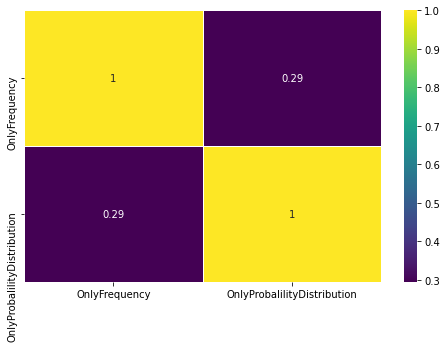

In [196]:
#analyse the train set using a Multivariate Analysis techniques i.e. Correlation matrix 
cormat=final_train_df.corr()
plt.figure(figsize=(8,5))
g= sns.heatmap(cormat,annot=True,cmap='viridis',linewidths=.5)

<AxesSubplot:xlabel='ClassName', ylabel='OnlyFrequency'>

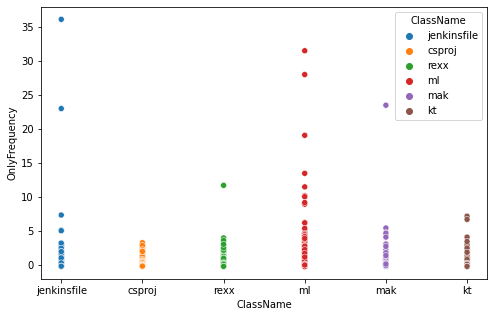

In [197]:
final_train_set=final_train_df.join(y_train)

plt.figure(figsize=(8,5))
sns.scatterplot(y='OnlyFrequency', x='ClassName', data=final_train_set, hue='ClassName')

<AxesSubplot:xlabel='ClassName', ylabel='OnlyProbalilityDistribution'>

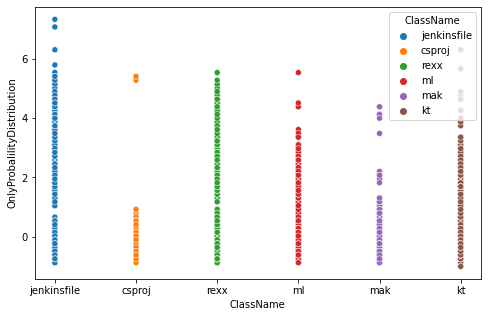

In [198]:
plt.figure(figsize=(8,5))
sns.scatterplot(y='OnlyProbalilityDistribution', x='ClassName', data=final_train_set, hue='ClassName')

<AxesSubplot:xlabel='OnlyValueForAbsoluteDistribution', ylabel='ClassName'>

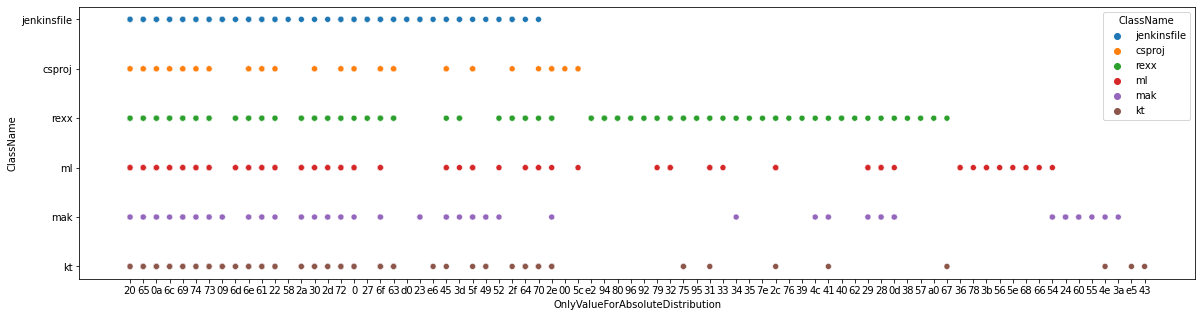

In [199]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='OnlyValueForAbsoluteDistribution', y='ClassName', data=final_train_set, hue='ClassName')

<AxesSubplot:xlabel='OnlyProbalilityDistribution', ylabel='ClassName'>

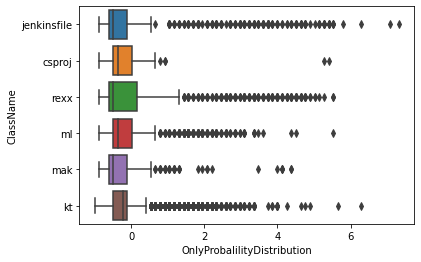

In [200]:
sns.boxplot(x=final_train_set['OnlyProbalilityDistribution'],y=final_train_set['ClassName'])

<AxesSubplot:xlabel='OnlyFrequency', ylabel='ClassName'>

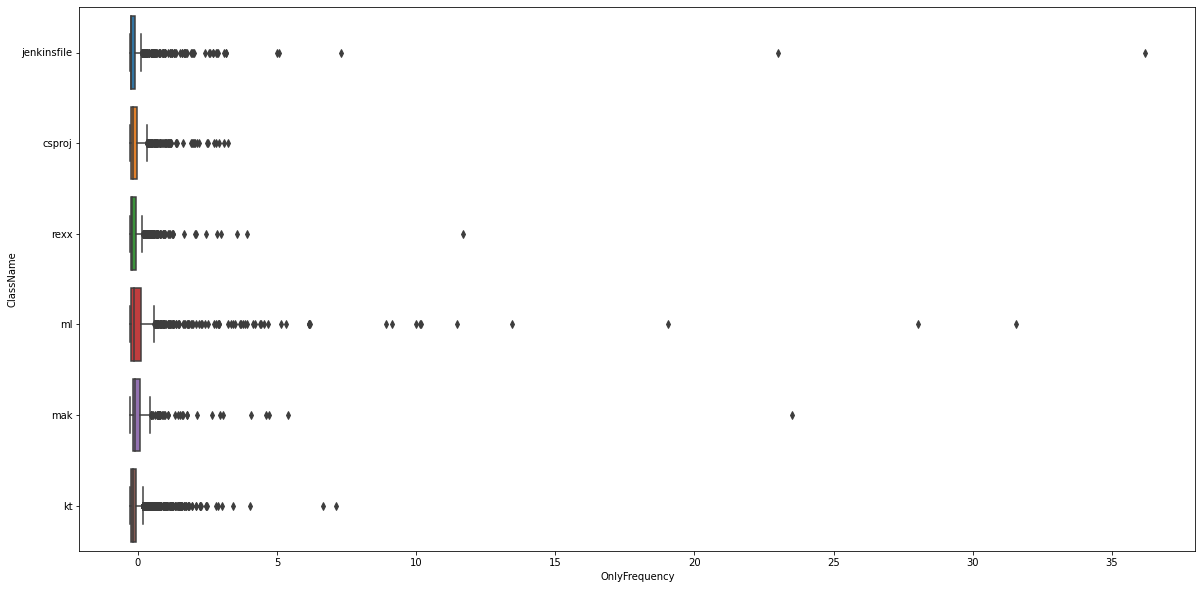

In [201]:
plt.figure(figsize=(20,10))
sns.boxplot(x=final_train_set['OnlyFrequency'],y=final_train_set['ClassName'])

## Feature Engineering

One-Hot Encoding of "OnlyValueForAbsoluteDistribution" label will help as it is the column which has both str and int type data.
It simply creates additional features based on the number of unique values in the categorical feature - "OnlyValueForAbsoluteDistribution". Every unique value in the category will be added as a feature.

##### One-Hot encoding the categorical parameters using get_dummies()

In [202]:
final_train_df=pd.get_dummies(final_train_df, columns = ['OnlyValueForAbsoluteDistribution'])
final_val_df=pd.get_dummies(final_val_df, columns = ['OnlyValueForAbsoluteDistribution'])
final_test_df=pd.get_dummies(final_test_df,columns = ['OnlyValueForAbsoluteDistribution'])

In [203]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7321 entries, 0 to 7320
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   OnlyFrequency                        7321 non-null   float64
 1   OnlyProbalilityDistribution          7321 non-null   float64
 2   OnlyValueForAbsoluteDistribution_0   7321 non-null   uint8  
 3   OnlyValueForAbsoluteDistribution_00  7321 non-null   uint8  
 4   OnlyValueForAbsoluteDistribution_09  7321 non-null   uint8  
 5   OnlyValueForAbsoluteDistribution_0a  7321 non-null   uint8  
 6   OnlyValueForAbsoluteDistribution_0d  7321 non-null   uint8  
 7   OnlyValueForAbsoluteDistribution_20  7321 non-null   uint8  
 8   OnlyValueForAbsoluteDistribution_22  7321 non-null   uint8  
 9   OnlyValueForAbsoluteDistribution_23  7321 non-null   uint8  
 10  OnlyValueForAbsoluteDistribution_24  7321 non-null   uint8  
 11  OnlyValueForAbsoluteDistributi

In [204]:
final_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   OnlyFrequency                        2666 non-null   float64
 1   OnlyProbalilityDistribution          2666 non-null   float64
 2   OnlyValueForAbsoluteDistribution_0   2666 non-null   uint8  
 3   OnlyValueForAbsoluteDistribution_00  2666 non-null   uint8  
 4   OnlyValueForAbsoluteDistribution_09  2666 non-null   uint8  
 5   OnlyValueForAbsoluteDistribution_0a  2666 non-null   uint8  
 6   OnlyValueForAbsoluteDistribution_0d  2666 non-null   uint8  
 7   OnlyValueForAbsoluteDistribution_20  2666 non-null   uint8  
 8   OnlyValueForAbsoluteDistribution_22  2666 non-null   uint8  
 9   OnlyValueForAbsoluteDistribution_23  2666 non-null   uint8  
 10  OnlyValueForAbsoluteDistribution_24  2666 non-null   uint8  
 11  OnlyValueForAbsoluteDistributi

In [205]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   OnlyFrequency                        302 non-null    float64
 1   OnlyProbalilityDistribution          302 non-null    float64
 2   OnlyValueForAbsoluteDistribution_0   302 non-null    uint8  
 3   OnlyValueForAbsoluteDistribution_00  302 non-null    uint8  
 4   OnlyValueForAbsoluteDistribution_0a  302 non-null    uint8  
 5   OnlyValueForAbsoluteDistribution_0d  302 non-null    uint8  
 6   OnlyValueForAbsoluteDistribution_20  302 non-null    uint8  
 7   OnlyValueForAbsoluteDistribution_22  302 non-null    uint8  
 8   OnlyValueForAbsoluteDistribution_23  302 non-null    uint8  
 9   OnlyValueForAbsoluteDistribution_28  302 non-null    uint8  
 10  OnlyValueForAbsoluteDistribution_29  302 non-null    uint8  
 11  OnlyValueForAbsoluteDistribution

final_train_df.drop('OnlyValueForAbsoluteDistribution', axis=1, inplace=True)
final_val_df.drop('OnlyValueForAbsoluteDistribution', axis=1, inplace=True)
final_test_df.drop('OnlyValueForAbsoluteDistribution', axis=1, inplace=True)

In [206]:
final_val_set=final_val_df.join(y_val)
final_test_set=final_test_df.join(y_test)

final_train_set['encoded_ClassName']= preprocessing.LabelEncoder().fit_transform(final_train_set['ClassName'])
final_y_train=final_train_set['encoded_ClassName']

final_val_set['encoded_ClassName']= preprocessing.LabelEncoder().fit_transform(final_val_set['ClassName'])
final_y_val=final_val_set['encoded_ClassName']

final_test_set['encoded_ClassName']= preprocessing.LabelEncoder().fit_transform(final_test_set['ClassName'])
final_y_test=final_test_set['encoded_ClassName']

## Feature Selection

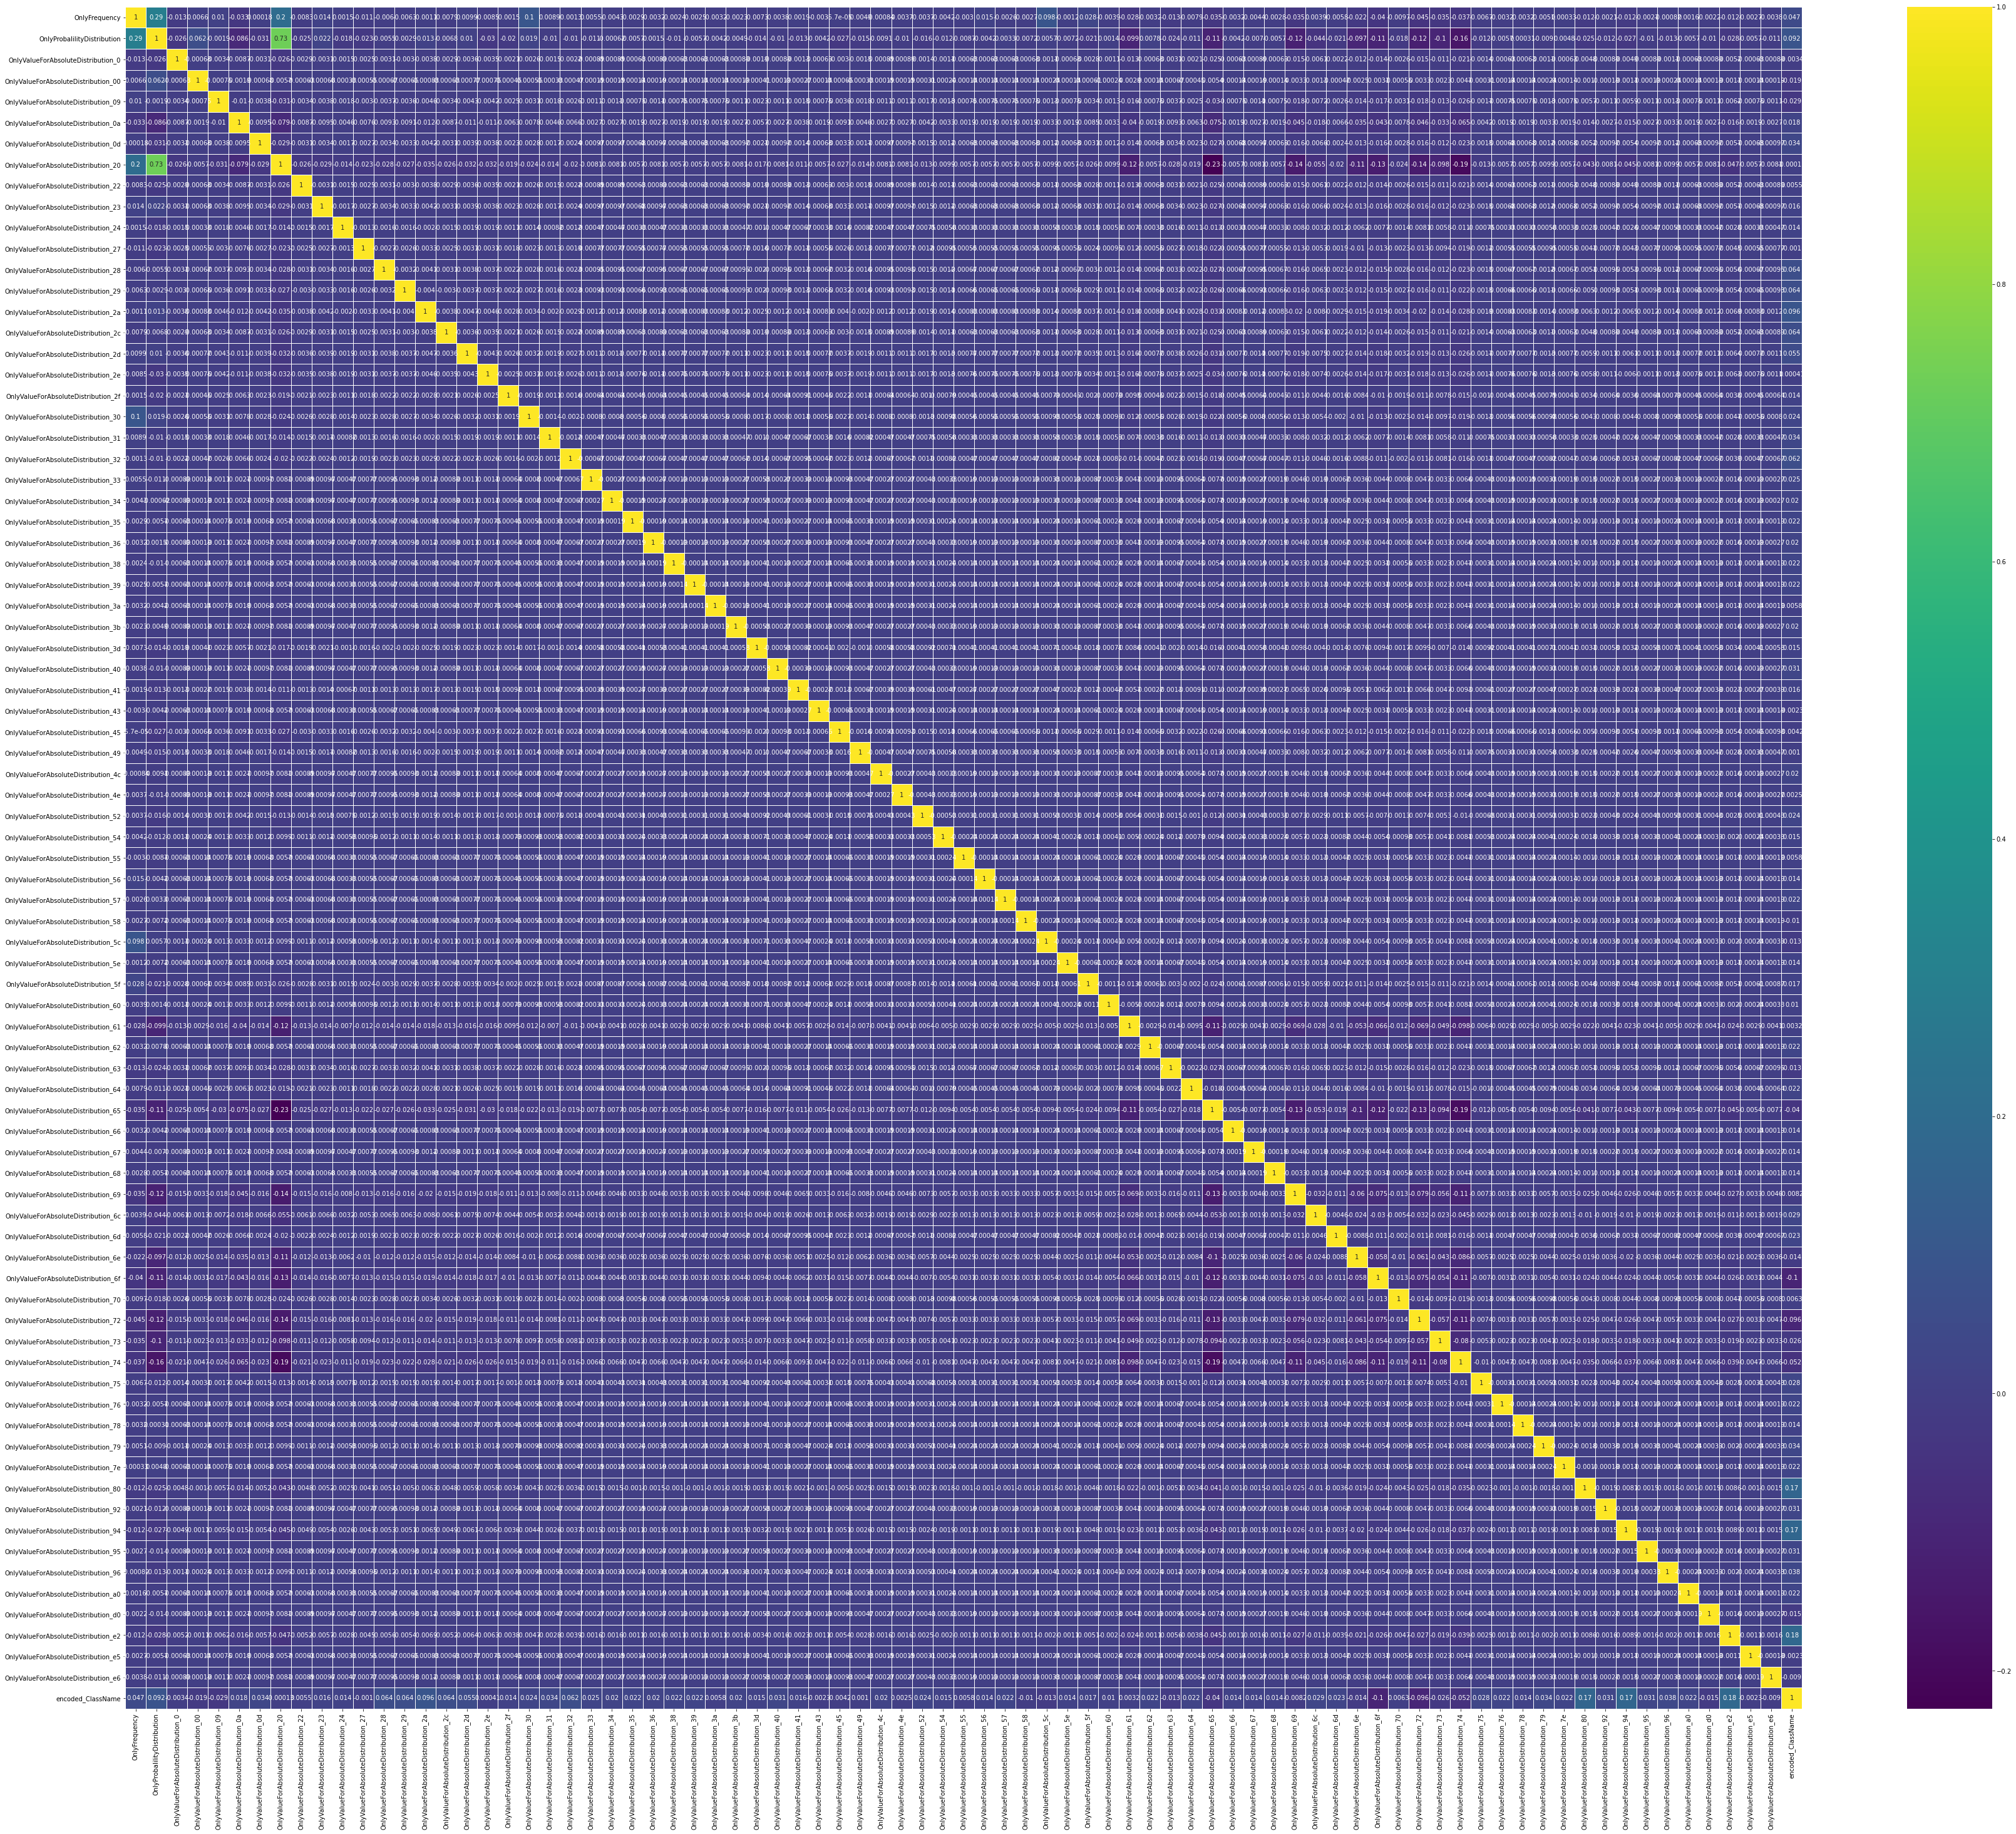

In [207]:
final_train_set=final_train_df.join(final_y_train)

cormat=final_train_set.corr()
plt.figure(figsize=(60,50))
g= sns.heatmap(cormat,annot=True,cmap='viridis',linewidths=.5)

In [222]:
correlated_features = set()
correlation_matrix=final_train_set.corr().abs()

for i in range(len(correlation_matrix .columns)):
    if abs(correlation_matrix.iloc[i, 80]) > 0.04:
        colname = correlation_matrix.columns[i]
        print("-"*50)   
        print(colname,"\n",correlation_matrix.iloc[i, 80])
        print("-"*50)

--------------------------------------------------
OnlyFrequency 
 0.04736779867188243
--------------------------------------------------
--------------------------------------------------
OnlyProbalilityDistribution 
 0.09239959409080782
--------------------------------------------------
--------------------------------------------------
OnlyValueForAbsoluteDistribution_28 
 0.06350886347335818
--------------------------------------------------
--------------------------------------------------
OnlyValueForAbsoluteDistribution_29 
 0.06365138380247366
--------------------------------------------------
--------------------------------------------------
OnlyValueForAbsoluteDistribution_2a 
 0.09582300154683326
--------------------------------------------------
--------------------------------------------------
OnlyValueForAbsoluteDistribution_2c 
 0.06405330441181246
--------------------------------------------------
--------------------------------------------------
OnlyValueForAbsolut

In [223]:
#As found above these features were having a good correlation with target hence we can keep them and remove the rest.
#I am keeping only 5 additional features as from each file I also extract only 5 maximum frequent bytes
"""
--------------------------------------------------
OnlyFrequency 
 0.04203620668260215
--------------------------------------------------
--------------------------------------------------
OnlyProbalilityDistribution 
 0.09387349130506747
--------------------------------------------------
--------------------------------------------------
OnlyValueForAbsoluteDistribution_80 
 0.14846575492645617
--------------------------------------------------
--------------------------------------------------
OnlyValueForAbsoluteDistribution_94 
 0.14846575492645617
--------------------------------------------------
--------------------------------------------------
OnlyValueForAbsoluteDistribution_e2 
 0.14846575492645617
--------------------------------------------------
--------------------------------------------------
OnlyValueForAbsoluteDistribution_2a 
 0.08567683058967268
--------------------------------------------------
--------------------------------------------------
OnlyValueForAbsoluteDistribution_72 
 0.09888809591864221
"""
final_train_df = final_train_df[['OnlyValueForAbsoluteDistribution_80','OnlyValueForAbsoluteDistribution_94','OnlyValueForAbsoluteDistribution_e2','OnlyValueForAbsoluteDistribution_2a','OnlyValueForAbsoluteDistribution_72','OnlyFrequency','OnlyProbalilityDistribution']]
final_val_df = final_val_df[['OnlyValueForAbsoluteDistribution_80','OnlyValueForAbsoluteDistribution_94','OnlyValueForAbsoluteDistribution_e2','OnlyValueForAbsoluteDistribution_2a','OnlyValueForAbsoluteDistribution_72','OnlyFrequency','OnlyProbalilityDistribution']]
final_test_df = final_test_df[['OnlyValueForAbsoluteDistribution_80','OnlyValueForAbsoluteDistribution_94','OnlyValueForAbsoluteDistribution_e2','OnlyValueForAbsoluteDistribution_2a','OnlyValueForAbsoluteDistribution_72','OnlyFrequency','OnlyProbalilityDistribution']]

final_train_df.info(),final_val_df.info(),final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7321 entries, 0 to 7320
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   OnlyValueForAbsoluteDistribution_80  7321 non-null   uint8  
 1   OnlyValueForAbsoluteDistribution_94  7321 non-null   uint8  
 2   OnlyValueForAbsoluteDistribution_e2  7321 non-null   uint8  
 3   OnlyValueForAbsoluteDistribution_2a  7321 non-null   uint8  
 4   OnlyValueForAbsoluteDistribution_72  7321 non-null   uint8  
 5   OnlyFrequency                        7321 non-null   float64
 6   OnlyProbalilityDistribution          7321 non-null   float64
dtypes: float64(2), uint8(5)
memory usage: 150.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   OnlyV

(None, None, None)

### Building Model

##### SVM

In [224]:
#Fitting Support Vector Classifer to the Training set
svmclassifier = SVC(C=10,kernel='rbf',gamma=100,decision_function_shape='ovo')
svmclassifier.fit(final_train_df, y_train)
# Predicting the Test set results
y_val_pred = svmclassifier.predict(final_val_df)
y_train_pred = svmclassifier.predict(final_train_df)
y_test_pred = svmclassifier.predict(final_test_df)
# Accuracy on the Train set results                              
print('\n'+'-'*20+'Accuracy Score on the Train set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_train,y_train_pred)))
# Accuracy on the Validation set results                              
print('\n'+'-'*20+'Accuracy Score on the Validation set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_val,y_val_pred)))
# Accuracy on the Test set results                              
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_test_pred)))


--------------------Accuracy Score on the Train set--------------------
61%

--------------------Accuracy Score on the Validation set--------------------
54%

--------------------Accuracy Score on the Test set--------------------
57%


In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      csproj       0.64      0.17      0.27        40
 jenkinsfile       0.36      0.32      0.34        25
          kt       0.59      0.94      0.72       142
         mak       0.58      0.47      0.52        15
          ml       0.12      0.03      0.04        40
        rexx       0.73      0.40      0.52        40

    accuracy                           0.57       302
   macro avg       0.50      0.39      0.40       302
weighted avg       0.53      0.57      0.50       302



#### Logistic Regression

In [226]:
# Fitting Logistic Regression to the Training set
logclassifier = LogisticRegression(max_iter=90000)
print(logclassifier)
logclassifier.fit(final_train_df, y_train)

y_val_pred = logclassifier.predict(final_val_df)
y_train_pred = logclassifier.predict(final_train_df)
y_test_pred = logclassifier.predict(final_test_df)
# Accuracy on the Train set results                              
print('\n'+'-'*20+'Accuracy Score on the Train set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_train,y_train_pred)))
# Accuracy on the Validation set results                              
print('\n'+'-'*20+'Accuracy Score on the Validation set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_val,y_val_pred)))
# Accuracy on the Test set results                              
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_test_pred)))

LogisticRegression(max_iter=90000)

--------------------Accuracy Score on the Train set--------------------
50%

--------------------Accuracy Score on the Validation set--------------------
53%

--------------------Accuracy Score on the Test set--------------------
51%


#### KNN

In [227]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=100)

# Train the model using the training sets
model.fit(final_train_df,y_train)

#Predict Output
y_val_pred = model.predict(final_val_df)
y_train_pred = model.predict(final_train_df)
y_test_pred = model.predict(final_test_df)
# Accuracy on the Train set results                              
print('\n'+'-'*20+'Accuracy Score on the Train set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_train,y_train_pred)))
# Accuracy on the Validation set results                              
print('\n'+'-'*20+'Accuracy Score on the Validation set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_val,y_val_pred)))
# Accuracy on the Test set results                              
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_test_pred)))


--------------------Accuracy Score on the Train set--------------------
55%

--------------------Accuracy Score on the Validation set--------------------
53%

--------------------Accuracy Score on the Test set--------------------
55%


#### Random Forest Classifier

In [228]:
# Fitting Random Forest Classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier()
print(rfclassifier)
rfclassifier.fit(final_train_df, y_train)

y_val_pred = rfclassifier.predict(final_val_df)
y_train_pred = rfclassifier.predict(final_train_df)
y_test_pred = rfclassifier.predict(final_test_df)
# Accuracy on the Train set results                              
print('\n'+'-'*20+'Accuracy Score on the Train set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_train,y_train_pred)))
# Accuracy on the Validation set results                              
print('\n'+'-'*20+'Accuracy Score on the Validation set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_val,y_val_pred)))
# Accuracy on the Test set results                              
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_test_pred)))

RandomForestClassifier()

--------------------Accuracy Score on the Train set--------------------
81%

--------------------Accuracy Score on the Validation set--------------------
48%

--------------------Accuracy Score on the Test set--------------------
52%




##### Checking of a self-made file and its data

In [229]:
data = [[0,1,0,1,0,45,5]]
new_df = pd.DataFrame(data, columns=['OnlyValueForAbsoluteDistribution_80','OnlyValueForAbsoluteDistribution_94','OnlyValueForAbsoluteDistribution_e2','OnlyValueForAbsoluteDistribution_2a','OnlyValueForAbsoluteDistribution_72','OnlyFrequency','OnlyProbalilityDistribution'])

In [230]:
new_df

,OnlyValueForAbsoluteDistribution_80,OnlyValueForAbsoluteDistribution_94,OnlyValueForAbsoluteDistribution_e2,OnlyValueForAbsoluteDistribution_2a,OnlyValueForAbsoluteDistribution_72,OnlyFrequency,OnlyProbalilityDistribution
0,0,1,0,1,0,45,5


In [231]:
print(svmclassifier.predict(new_df))

['kt']


### Save the model built using SVM

In [232]:
filename='finalftimodel.sav'

In [233]:
pickle.dump(svmclassifier, open(filename, 'wb'))

In [234]:
#trying to load the model back again and test on the above self made data
load_model = pickle.load(open(filename,'rb'))

In [235]:
print(load_model.score(final_test_df,y_test))

0.5695364238410596
